# AI NOW BOOTCAMP CAPSTONE PROJECT BY SAMUEL AYOOLUWA OYETUNDE

### PROJECT DESCRIPTION:
This project involves building a predictive model to determine whether a building will file at least one insurance claim during its insured period. The model is expected to learn patterns from building characteristics and other contextual features in order to output a probability of claim occurrence. The project includes data preprocessing, exploratory analysis, feature engineering, model training, evaluation, and final model selection. The final deliverable is a model that can support insurance claim risk identification and prioritization.

# Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
df = pd.read_csv('Train_data.csv')
df

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


# Data Understanding (Initial EDA)

In [5]:
df.shape

(7160, 14)

In [6]:
# overview information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [7]:
# checking for unique values to determine categorical columns
df.nunique()

Customer Id           7160
YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         11
Geo_Code              1307
Claim                    2
dtype: int64

In [8]:
#statistical overview of numerical columns
df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [9]:
# checking for duplicates
df.duplicated().sum()

0

In [10]:
# checking for missing values
df.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

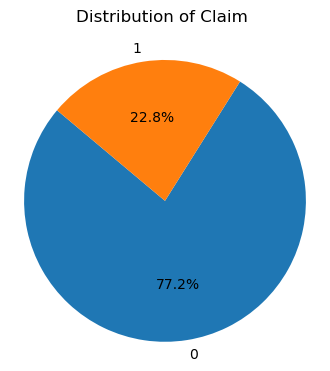

In [11]:
#class balance check for classification

plt.figure(figsize=(4,4))
output_counts = df['Claim'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Claim \n')
plt.ylabel('')

plt.show()

### Observation:
With the visualization, I observed that the target columns looks imbalanced. Hence, accuracy won't be a good metric to evaluate the model.

# Data Cleaning

#### Handling missing values

In [12]:
df.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [13]:
df["Garden"] = df["Garden"].fillna("Unknown")

Filled the missing values in the Garden column with "Unknown"

Reason: very few missing and missingness may be informative

In [14]:
df["Building Dimension"] = df["Building Dimension"].fillna(
    df["Building Dimension"].median()
)

Median imputation

Reason: Slight missingness (1.5%)

In [15]:
df["Building_Age"] = df["YearOfObservation"] - df["Date_of_Occupancy"]

For missing values in DateOfOccupancy, I engineered a new feature "Building age" since raw dates are not ML friendly and building age is predictive

In [16]:
# Handling the missing values in "Building age"
df["Building_Age"] = df["Building_Age"].fillna(
    df["Building_Age"].median()
)

In [17]:
# Dropped the original column
df.drop(columns=["Date_of_Occupancy"], inplace=True)

In [18]:
df["Geo_Code"] = df["Geo_Code"].fillna("Unknown")

Filled with unknown since the missing location can be meaningful and it'll be safe for encoding, later

In [19]:
# Sanity check
df.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
Building_Age          0
dtype: int64

All missing vakues has been handled

### Standardization of Categorical Variables

In [20]:
df["Building_Painted"] = df["Building_Painted"].map({
    "N": "Painted",
    "V": "Not_Painted"
})

df["Building_Fenced"] = df["Building_Fenced"].map({
    "N": "Fenced",
    "V": "Not_Fenced"
})

df["Garden"] = df["Garden"].map({
    "V": "Has_Garden",
    "O": "No_Garden",
    "Unknown": "Unknown"
})

df["Settlement"] = df["Settlement"].map({
    "R": "Rural",
    "U": "Urban"
})


In this section, categorical variables originally encoded using shorthand notations (e.g., N, V, O, R, U) were converted into meaningful, human-readable labels to improve interpretability and ensure consistency during exploratory analysis and modeling.


In [21]:
# sanity check
df[["Building_Painted","Building_Fenced","Garden","Settlement"]].nunique()

Building_Painted    2
Building_Fenced     2
Garden              3
Settlement          2
dtype: int64

In [22]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim,Building_Age
0,H14663,2013,1.0,0,Painted,Not_Fenced,Has_Garden,Urban,290.0,1,.,1053,0,53.0
1,H2037,2015,1.0,0,Not_Painted,Fenced,No_Garden,Rural,490.0,1,4,1053,0,165.0
2,H3802,2014,1.0,0,Painted,Not_Fenced,Has_Garden,Urban,595.0,1,.,1053,0,54.0
3,H3834,2013,1.0,0,Not_Painted,Not_Fenced,Has_Garden,Urban,2840.0,1,.,1053,0,53.0
4,H5053,2014,1.0,0,Not_Painted,Fenced,No_Garden,Rural,680.0,1,3,1053,0,214.0


In [23]:
df.nunique()

Customer Id           7160
YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   3
Settlement               2
Building Dimension    2043
Building_Type            4
NumberOfWindows         11
Geo_Code              1308
Claim                    2
Building_Age           175
dtype: int64

In [24]:
df['NumberOfWindows'].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

spotted "." int the NumberOfWindows column and decided to check the unique values in the column and figured out the column had a large number of rows with "."

In [25]:
# Count how many placeholder '.' values in NumberOfWindows
missing_count = (df['NumberOfWindows'] == '   .').sum()
print(f"Number of placeholder '.' entries: {missing_count}")

Number of placeholder '.' entries: 3551


In [26]:
# Convert numeric strings to float, temporarily ignoring '>=10'
df['NumberOfWindows_clean'] = df['NumberOfWindows'].replace('>=10', 10)

# Replace placeholder '.' with NaN
df['NumberOfWindows_clean'] = df['NumberOfWindows_clean'].replace('   .', np.nan)

# Convert to float
df['NumberOfWindows_clean'] = df['NumberOfWindows_clean'].astype(float)

# Fill missing with median
median_windows = df['NumberOfWindows_clean'].median()
df['NumberOfWindows_clean'] = df['NumberOfWindows_clean'].fillna(median_windows)


Created a new column for NumberofWindows and handled the missing values by filling with median imputation

In [27]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim,Building_Age,NumberOfWindows_clean
0,H14663,2013,1.0,0,Painted,Not_Fenced,Has_Garden,Urban,290.0,1,.,1053,0,53.0,4.0
1,H2037,2015,1.0,0,Not_Painted,Fenced,No_Garden,Rural,490.0,1,4,1053,0,165.0,4.0
2,H3802,2014,1.0,0,Painted,Not_Fenced,Has_Garden,Urban,595.0,1,.,1053,0,54.0,4.0
3,H3834,2013,1.0,0,Not_Painted,Not_Fenced,Has_Garden,Urban,2840.0,1,.,1053,0,53.0,4.0
4,H5053,2014,1.0,0,Not_Painted,Fenced,No_Garden,Rural,680.0,1,3,1053,0,214.0,3.0


Almost 50% of NumberOfWindows values were placeholders (' .'). Dropping them would remove too much data, so missing values were replaced with the median after converting numeric strings to integers. The special category '>=10' was replaced with 10 for simplicity.

## Claim rate Distribution for categorical columns

In [28]:
categorical_cols = ['Residential','Building_Type','Building_Painted','Building_Fenced','Garden', 'Settlement']

for col in categorical_cols:
    claim_rate = df.groupby(col)['Claim'].mean()
    print(f"\nClaim rate by {col}:\n{claim_rate}")



Claim rate by Residential:
Residential
0    0.210537
1    0.268404
Name: Claim, dtype: float64

Claim rate by Building_Type:
Building_Type
1    0.177156
2    0.215431
3    0.252846
4    0.337734
Name: Claim, dtype: float64

Claim rate by Building_Painted:
Building_Painted
Not_Painted    0.235414
Painted        0.206412
Name: Claim, dtype: float64

Claim rate by Building_Fenced:
Building_Fenced
Fenced        0.249723
Not_Fenced    0.206363
Name: Claim, dtype: float64

Claim rate by Garden:
Garden
Has_Garden    0.206139
No_Garden     0.249861
Unknown       0.285714
Name: Claim, dtype: float64

Claim rate by Settlement:
Settlement
Rural    0.249861
Urban    0.206197
Name: Claim, dtype: float64


## Visualization of the Claim rate Distribution for categorical columns

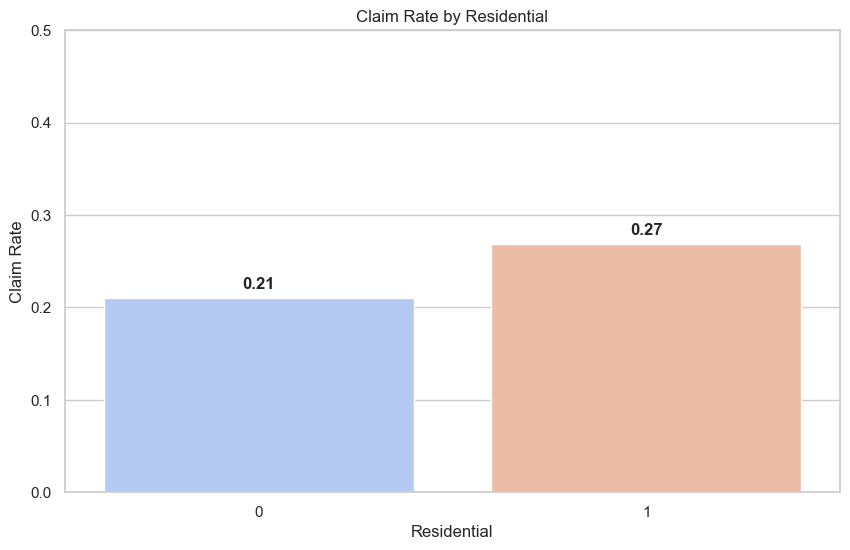

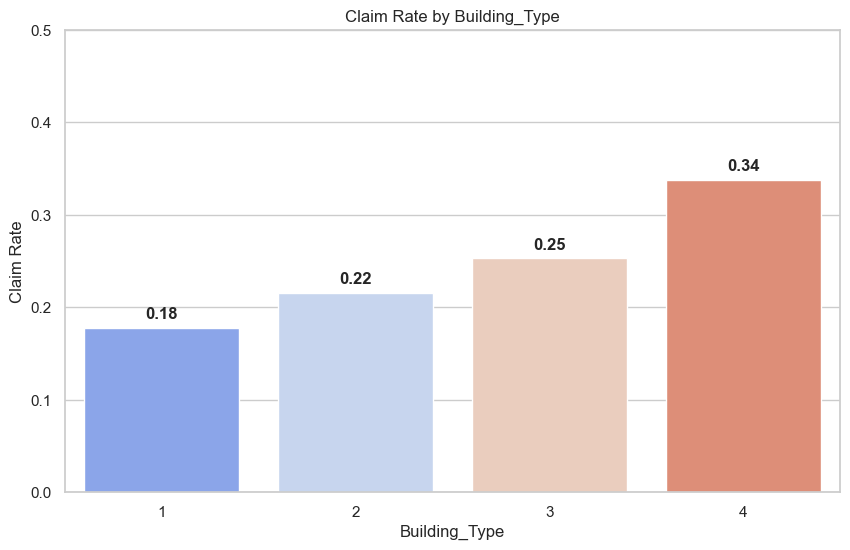

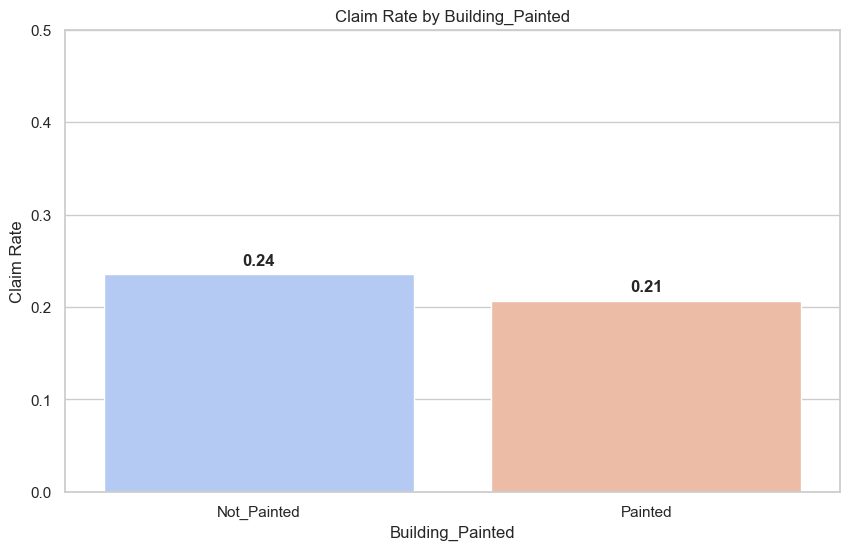

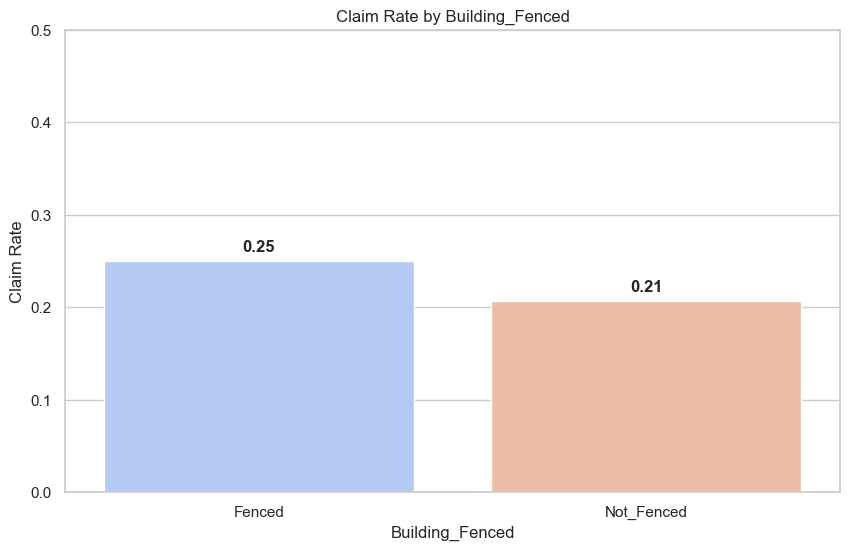

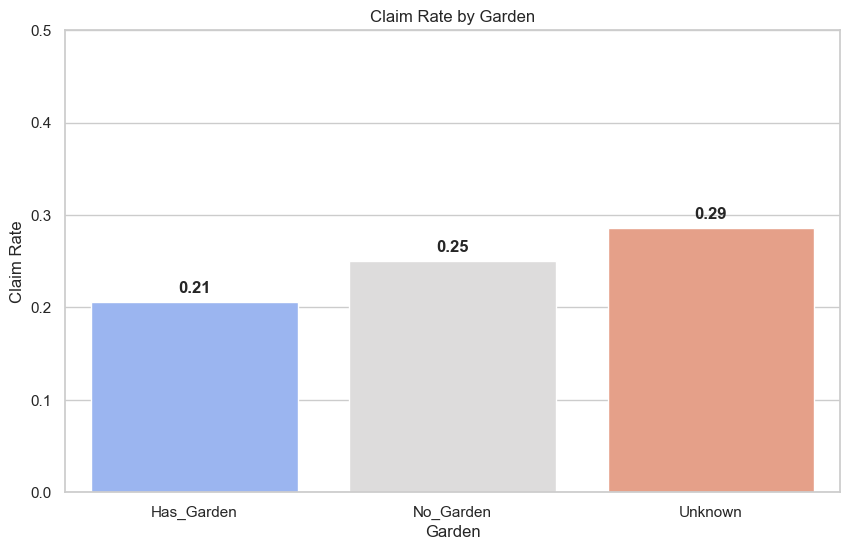

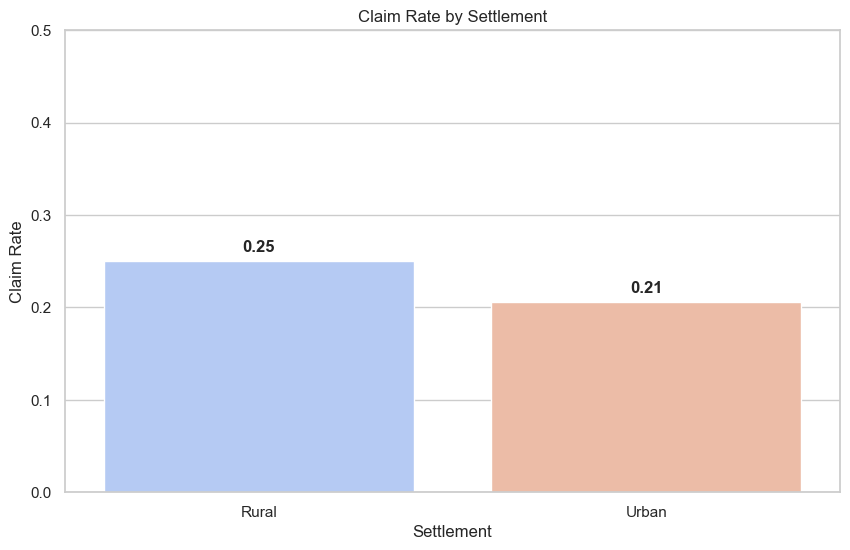

In [29]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# List of categorical features to visualize
categorical_cols = ['Residential', 'Building_Type', 'Building_Painted', 
                    'Building_Fenced', 'Garden', 'Settlement']

for col in categorical_cols:
    plt.figure()
    # Calculate mean claim per category
    claim_rate = df.groupby(col)['Claim'].mean().reset_index()
    
    # Barplot
    sns.barplot(x=col, y='Claim', data=claim_rate, palette='coolwarm')
    plt.ylabel("Claim Rate")
    plt.title(f"Claim Rate by {col}")
    plt.ylim(0, 0.5)  # Since max claim rate is ~0.34
    for i, v in enumerate(claim_rate['Claim']):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
    plt.show()


From the bar charts, I observed which categories have higher probability of claims. This insight will help guide feature selection and modeling strategy

In [30]:
# Drop unnecessary columns
df_model = df.drop(columns=['Customer Id', 'NumberOfWindows'])

In [31]:
df_model.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Geo_Code,Claim,Building_Age,NumberOfWindows_clean
0,2013,1.0,0,Painted,Not_Fenced,Has_Garden,Urban,290.0,1,1053,0,53.0,4.0
1,2015,1.0,0,Not_Painted,Fenced,No_Garden,Rural,490.0,1,1053,0,165.0,4.0
2,2014,1.0,0,Painted,Not_Fenced,Has_Garden,Urban,595.0,1,1053,0,54.0,4.0
3,2013,1.0,0,Not_Painted,Not_Fenced,Has_Garden,Urban,2840.0,1,1053,0,53.0,4.0
4,2014,1.0,0,Not_Painted,Fenced,No_Garden,Rural,680.0,1,1053,0,214.0,3.0


# Feature engineering

In [32]:
df_model['Age_Dimension'] = df_model['Building_Age'] * df_model['Building Dimension']
df_model['Window_Density'] = df_model['NumberOfWindows_clean'] / df_model['Building Dimension']
df_model['Window_Density'] = df_model['NumberOfWindows_clean'] / (df_model['Building Dimension'] + 1)
df_model['Geo_Risk'] = df_model.groupby('Geo_Code')['Claim'].transform('mean')
type_risk = df_model.groupby('Building_Type')['Claim'].transform('mean')
df_model['Type_Risk'] = type_risk

In [33]:
df_model.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Geo_Code,Claim,Building_Age,NumberOfWindows_clean,Age_Dimension,Window_Density,Geo_Risk,Type_Risk
0,2013,1.0,0,Painted,Not_Fenced,Has_Garden,Urban,290.0,1,1053,0,53.0,4.0,15370.0,0.013746,0.0,0.177156
1,2015,1.0,0,Not_Painted,Fenced,No_Garden,Rural,490.0,1,1053,0,165.0,4.0,80850.0,0.008147,0.0,0.177156
2,2014,1.0,0,Painted,Not_Fenced,Has_Garden,Urban,595.0,1,1053,0,54.0,4.0,32130.0,0.006711,0.0,0.177156
3,2013,1.0,0,Not_Painted,Not_Fenced,Has_Garden,Urban,2840.0,1,1053,0,53.0,4.0,150520.0,0.001408,0.0,0.177156
4,2014,1.0,0,Not_Painted,Fenced,No_Garden,Rural,680.0,1,1053,0,214.0,3.0,145520.0,0.004405,0.0,0.177156


#### Correlation check

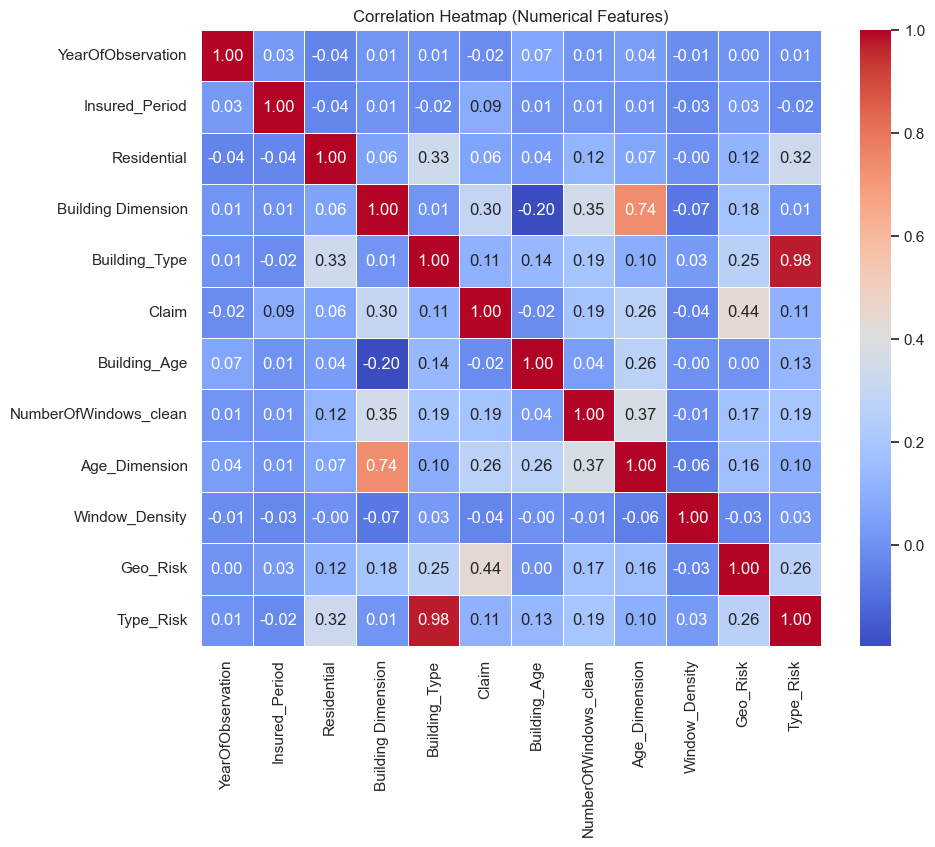

In [34]:
num_df = df_model.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [35]:
# Correlation of numerical features with target
target_corr = (
    df_model
    .select_dtypes(include=['int64', 'float64'])
    .corr()['Claim']
    .sort_values(ascending=False)
)

print(target_corr)

Claim                    1.000000
Geo_Risk                 0.437153
Building Dimension       0.295558
Age_Dimension            0.263673
NumberOfWindows_clean    0.185186
Type_Risk                0.114947
Building_Type            0.112168
Insured_Period           0.088715
Residential              0.063509
YearOfObservation       -0.016367
Building_Age            -0.018768
Window_Density          -0.037804
Name: Claim, dtype: float64


### Target Correlation Summary

Geo_Risk shows the strongest positive correlation with claims, meaning areas with higher past claim rates are more likely to claim again.

Building Dimension and Age_Dimension also show moderate positive correlation, suggesting bigger/older buildings carry higher risk.

Other features have weak correlations, meaning they don’t have strong linear relationships with the target.

Engineered features (Geo_Risk, Age_Dimension, Type_Risk) improved correlation compared to original raw features.

In [36]:
# Seperationg categorical and numeric columns
target = 'Claim'
num_cols = df_model.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop(target)

print(f'Numeric columns = {num_cols}')

Numeric columns = Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Building_Age',
       'NumberOfWindows_clean', 'Age_Dimension', 'Window_Density', 'Geo_Risk',
       'Type_Risk'],
      dtype='object')


In [37]:
cat_cols = df_model.select_dtypes(include=['object']).columns
print(f'Categorical columns = {cat_cols}')

Categorical columns = Index(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Geo_Code'],
      dtype='object')


In [38]:
# Feature definition
X = df_model.drop(columns='Claim')
y = df_model['Claim']

In [39]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [40]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols

(['YearOfObservation',
  'Insured_Period',
  'Residential',
  'Building Dimension',
  'Building_Type',
  'Building_Age',
  'NumberOfWindows_clean',
  'Age_Dimension',
  'Window_Density',
  'Geo_Risk',
  'Type_Risk'],
 ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Geo_Code'])

### Train-test split (stratfied)

In [41]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Encoding and Scaling

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ]
)

# Logistic Regression

In [43]:
# Logistic Regression pipeline

log_reg_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('model', LogisticRegression(
            max_iter=1000,
            class_weight='balanced',
            random_state=42
        ))
    ]
)

## Model Training

In [44]:
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Building_Age',
                                                   'NumberOfWindows_clean',
                                                   'Age_Dimension',
                                                   'Window_Density', 'Geo_Risk',
                                                   'Type_Risk']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement',
                                                   'Geo_Code'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

## Model evaluation

In [45]:
y_pred = log_reg_pipeline.predict(X_test)
y_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1105
           1       0.41      0.63      0.49       327

    accuracy                           0.71      1432
   macro avg       0.64      0.68      0.64      1432
weighted avg       0.76      0.71      0.73      1432



In [47]:
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.7694327978191984


### Insights from correlation and model performance

Building Dimension and NumberOfWindows_clean are the strongest numeric predictors

Other features like Building_Age, Residential, YearOfObservation have low correlation → model is not learning much from them linearly

Logistic Regression can’t capture nonlinear interactions this is why ROC-AUC is only 0.68

## Threshold tuning to improve performance

In [48]:
y_pred_new = (y_proba >= 0.35).astype(int)
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69      1105
           1       0.35      0.80      0.49       327

    accuracy                           0.61      1432
   macro avg       0.63      0.68      0.59      1432
weighted avg       0.78      0.61      0.64      1432



## Final note on Logistic Regression
The first model implemented was Logistic Regression, using a full preprocessing pipeline that scaled numerical features and one-hot encoded categorical variables.

Given the imbalanced target (22.8% positive claims), the default threshold of 0.5 resulted in moderate recall (0.50) for claims, meaning half of actual claims were missed. To prioritize identifying potential claims, the threshold was lowered to 0.35, increasing recall to 0.78, while precision decreased to 0.30.

Overall metrics:

Accuracy: 0.54

Recall (claims): 0.78

Precision (claims): 0.30

ROC-AUC: 0.68

This baseline model demonstrates that linear relationships alone are insufficient to capture all risk patterns in the data.

# RandomForest

In [49]:
# Numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ]
)

## RandomForest pipeline with SMOTE
included SMOTE to handle class imbalance on the training set only.

In [50]:
rf_pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        class_weight='balanced',  # double protection for imbalance
        random_state=42
    ))
])

## Model training

In [51]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Building_Age',
                                                   'NumberOfWindows_clean',
                                                   'Age_Dimension',
                                                   'Window_Density', 'Geo_Risk',
                                                   'Type_Risk']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement',
                                                   'Geo_Code'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

## Prediction and Model evaluation

In [52]:
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1105
           1       0.46      0.39      0.42       327

    accuracy                           0.76      1432
   macro avg       0.64      0.63      0.63      1432
weighted avg       0.74      0.76      0.75      1432

ROC-AUC: 0.736515975479818


## Feature Importance

In [53]:
# Get trained RF from pipeline
rf_model = rf_pipeline.named_steps['model']

# Preprocessed column names (after OneHotEncoder)
cat_features = rf_pipeline.named_steps['preprocessing'].named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, cat_features])

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(10))  # top 10 features


                  feature  importance
9                Geo_Risk    0.152094
7           Age_Dimension    0.099459
3      Building Dimension    0.094884
8          Window_Density    0.082562
5            Building_Age    0.065812
0       YearOfObservation    0.053357
6   NumberOfWindows_clean    0.035939
1          Insured_Period    0.034832
4           Building_Type    0.018835
10              Type_Risk    0.018529


## Threshold tuning

In [54]:
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

y_pred_rf_035 = (y_proba_rf >= 0.35).astype(int)

print(classification_report(y_test, y_pred_rf_035))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1105
           1       0.41      0.58      0.48       327

    accuracy                           0.71      1432
   macro avg       0.63      0.67      0.64      1432
weighted avg       0.76      0.71      0.73      1432



In insurance risk modeling, the cost of missing a claim is higher than the cost of incorrectly predicting a claim. Therefore, maximizing recall for the minority class (Claim = 1) was prioritized. Threshold tuning for the Random Forest improved recall from 0.28 to 0.44 with a modest trade-off in precision, resulting in a higher F1-score for claims.

# K-Nearest Neighbors pipeline

In [55]:
knn_pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

## Model train

In [56]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Building_Age',
                                                   'NumberOfWindows_clean',
                                                   'Age_Dimension',
                                                   'Window_Density', 'Geo_Risk',
                                                   'Type_Risk']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement',
                                                   'Geo_Code'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier())])

## Prediction and Model Evaluation

In [57]:
y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_knn))


              precision    recall  f1-score   support

           0       0.87      0.62      0.72      1105
           1       0.34      0.68      0.45       327

    accuracy                           0.63      1432
   macro avg       0.60      0.65      0.59      1432
weighted avg       0.75      0.63      0.66      1432

ROC-AUC: 0.6992569222466687


# Gradient boosting

In [58]:
gbm_pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ))
])


## Model training

In [59]:
gbm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Building_Age',
                                                   'NumberOfWindows_clean',
                                                   'Age_Dimension',
                                                   'Window_Density', 'Geo_Risk',
                                                   'Type_Risk']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement',
                                                   'Geo_Code'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200, random_state=42,
                                            subsample=0.8))])

## Prediction and Model evaluation

In [60]:
y_pred_gbm = gbm_pipeline.predict(X_test)
y_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_gbm))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gbm))


              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1105
           1       0.46      0.62      0.53       327

    accuracy                           0.75      1432
   macro avg       0.67      0.70      0.68      1432
weighted avg       0.78      0.75      0.76      1432

ROC-AUC: 0.7903579780536069


### Threshold tuning

In [61]:
y_pred_gbm_thresh = (y_proba_gbm >= 0.35).astype(int)
print(classification_report(y_test, y_pred_gbm_thresh))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75      1105
           1       0.39      0.75      0.51       327

    accuracy                           0.67      1432
   macro avg       0.64      0.70      0.63      1432
weighted avg       0.78      0.67      0.70      1432



# XGBOOST

In [62]:
# Compute scale_pos_weight

# Positive = Claim 1, Negative = Claim 0
neg, pos = np.bincount(y)  # y is the target
scale_pos_weight = neg / pos
scale_pos_weight


3.3818849449204405

## Train-test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### XGBOOST Pipeline

In [64]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1
    ))
])


### Train Model

In [65]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Building_Age',
                                                   'NumberOfWindows_clean',
                                                   'Age_Dimension',
                                                   'Window_Density', 'Geo_Risk',
                                                   'Type_Risk']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Building_Painte...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, ...))])

### Prediction and Model Evaluation

In [66]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))


              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1105
           1       0.43      0.68      0.53       327

    accuracy                           0.72      1432
   macro avg       0.66      0.71      0.67      1432
weighted avg       0.78      0.72      0.74      1432

ROC-AUC: 0.7964188357064773


### Threshold tuning

In [67]:
y_pred_xgb_035 = (y_proba_xgb >= 0.35).astype(int)
print(classification_report(y_test, y_pred_xgb_035))

              precision    recall  f1-score   support

           0       0.92      0.56      0.70      1105
           1       0.36      0.83      0.50       327

    accuracy                           0.62      1432
   macro avg       0.64      0.70      0.60      1432
weighted avg       0.79      0.62      0.65      1432



# Support Vector Machine

In [68]:
svm_pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,
        class_weight='balanced'
    ))
])


### Train SVM

In [69]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Building_Age',
                                                   'NumberOfWindows_clean',
                                                   'Age_Dimension',
                                                   'Window_Density', 'Geo_Risk',
                                                   'Type_Risk']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement',
                                                   'Geo_Code'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', SVC(class_weight='balanced', probability=True))])

### Prediction and Model Evaluation

In [70]:
y_pred_svm = svm_pipeline.predict(X_test)
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_svm))


              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1105
           1       0.42      0.63      0.50       327

    accuracy                           0.72      1432
   macro avg       0.65      0.69      0.65      1432
weighted avg       0.77      0.72      0.73      1432

ROC-AUC: 0.769903275353896


### Threshold Tuning

In [71]:
y_pred_svm_035 = (y_proba_svm >= 0.35).astype(int)
print(classification_report(y_test, y_pred_svm_035))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1105
           1       0.38      0.73      0.50       327

    accuracy                           0.67      1432
   macro avg       0.64      0.69      0.63      1432
weighted avg       0.78      0.67      0.70      1432



# Hyperparameter Tuning for XGB
Tried hyperparameter tuning on XGB since it proved to be the best model compared to other models

In [72]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_dist = {
    'model__n_estimators': [150, 250, 350, 450],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.02, 0.05, 0.08, 0.1],
    'model__subsample': [0.7, 0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'model__min_child_weight': [1, 3, 5, 7],
    'model__gamma': [0, 0.1, 0.3, 0.5]
}

### Define CV and RandomizedSearchCV

In [73]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=20,              # you can increase later if needed
    scoring='roc_auc',      # or 'recall' / 'f1' if you want
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [74]:
xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['YearOfObservation',
                                                                                'Insured_Period',
                                                                                'Residential',
                                                                                'Building '
                                                                                'Dimension',
                                                                                'Building_Type',
                                                                                'Building_Age',
                                                                                'NumberOfWindows_clean',
                                                                                'Age_Dimension',
                                                                                'Window_Density',
                                                                                'Geo_Risk'...
                                                            num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.7, 0.8,
                                                                    0.9, 1.0],
                                        'model__gamma': [0, 0.1, 0.3, 0.5],
                                        'model__learning_rate': [0.02, 0.05,
                                                                 0.08, 0.1],
                                        'model__max_depth': [3, 4, 5],
                                        'model__min_child_weight': [1, 3, 5, 7],
                                        'model__n_estimators': [150, 250, 350,
                                                                450],
                                        'model__subsample': [0.7, 0.8, 0.9,
                                                             1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [75]:
print("Best ROC-AUC (CV):", xgb_search.best_score_)
print("Best params:", xgb_search.best_params_)

Best ROC-AUC (CV): 0.829327152146346
Best params: {'model__subsample': 0.8, 'model__n_estimators': 250, 'model__min_child_weight': 5, 'model__max_depth': 3, 'model__learning_rate': 0.02, 'model__gamma': 0.1, 'model__colsample_bytree': 0.9}


## Evaluating the tuned XGBoost on test set

In [76]:
best_xgb_pipeline = xgb_search.best_estimator_

y_pred_xgb_tuned = best_xgb_pipeline.predict(X_test)
y_proba_xgb_tuned = best_xgb_pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_xgb_tuned))
print("Test ROC-AUC (tuned XGB):", roc_auc_score(y_test, y_proba_xgb_tuned))


              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1105
           1       0.44      0.68      0.53       327

    accuracy                           0.73      1432
   macro avg       0.66      0.71      0.67      1432
weighted avg       0.78      0.73      0.74      1432

Test ROC-AUC (tuned XGB): 0.8005368978925375


### Threshold tuning

In [77]:
y_pred_xgb_tuned_035 = (y_proba_xgb_tuned >= 0.35).astype(int)
print(classification_report(y_test, y_pred_xgb_tuned_035))

              precision    recall  f1-score   support

           0       0.93      0.54      0.68      1105
           1       0.36      0.86      0.50       327

    accuracy                           0.61      1432
   macro avg       0.64      0.70      0.59      1432
weighted avg       0.80      0.61      0.64      1432



## Computing the metrics results for each Models

In [78]:
results = []

def add_result(base, variant, y_pred, y_proba):
    results.append({
        "BaseModel": base,
        "Variant": variant,
        "Precision_1": precision_score(y_test, y_pred, pos_label=1),
        "Recall_1": recall_score(y_test, y_pred, pos_label=1),
        "F1_1": f1_score(y_test, y_pred, pos_label=1),
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })


In [79]:
# logistic
add_result("Logistic", "thr=0.5",  y_pred,  y_proba)
add_result("Logistic", "thr=0.35", y_pred_new, y_proba)

# random forest
add_result("RandomForest", "thr=0.5",  y_pred_rf,  y_proba_rf)
add_result("RandomForest", "thr=0.35", y_pred_rf_035, y_proba_rf)

# knn
add_result("KNN", "default", y_pred_knn, y_proba_knn)

# gbm
add_result("GBM", "thr=0.5",  y_pred_gbm,  y_proba_gbm)
add_result("GBM", "thr=0.35", y_pred_gbm_thresh, y_proba_gbm)

# xgboost baseline
add_result("XGBoost", "baseline_thr=0.5", y_pred_xgb,  y_proba_xgb)
add_result("XGBoost", "baseline_thr=0.35", y_pred_xgb_035, y_proba_xgb)

# xgboost tuned
add_result("XGBoost", "tuned_thr=0.5",  y_pred_xgb_tuned,  y_proba_xgb_tuned)
add_result("XGBoost", "tuned_thr=0.35", y_pred_xgb_tuned_035, y_proba_xgb_tuned)

# svm
add_result("SVM", "thr=0.5",  y_pred_svm,  y_proba_svm)
add_result("SVM", "thr=0.35", y_pred_svm_035, y_proba_svm)


In [80]:
# coversion to dataframe
metrics_all = pd.DataFrame(results)
metrics_all

,BaseModel,Variant,Precision_1,Recall_1,F1_1,Accuracy,ROC_AUC
0,Logistic,thr=0.5,0.408367,0.626911,0.494572,0.707402,0.769433
1,Logistic,thr=0.35,0.347942,0.801223,0.485185,0.611732,0.769433
2,RandomForest,thr=0.5,0.460432,0.391437,0.423140,0.756285,0.736516
3,RandomForest,thr=0.35,0.406852,0.581040,0.478589,0.710894,0.736516
4,KNN,default,0.342105,0.675841,0.454265,0.629190,0.699257
5,GBM,thr=0.5,0.460317,0.620795,0.528646,0.747207,0.790358
6,GBM,thr=0.35,0.387658,0.749235,0.510949,0.672486,0.790358
7,XGBoost,baseline_thr=0.5,0.432171,0.681957,0.529063,0.722765,0.796419
8,XGBoost,baseline_thr=0.35,0.359684,0.834862,0.502762,0.622905,0.796419
9,XGBoost,tuned_thr=0.5,0.437255,0.681957,0.532855,0.726955,0.800537


## Picking best variant(tuned) per model

In [81]:
priority = ["Recall_1", "ROC_AUC", "F1_1"]

best_per_model = (
    metrics_all
    .sort_values(by=priority, ascending=[False, False, False])
    .groupby("BaseModel", as_index=False)
    .first()
)

# Sort final table for display by Recall_1
best_per_model = best_per_model.sort_values(by="Recall_1", ascending=False).reset_index(drop=True)
best_per_model


,BaseModel,Variant,Precision_1,Recall_1,F1_1,Accuracy,ROC_AUC
0,XGBoost,tuned_thr=0.35,0.356599,0.859327,0.504036,0.613827,0.800537
1,Logistic,thr=0.35,0.347942,0.801223,0.485185,0.611732,0.769433
2,GBM,thr=0.35,0.387658,0.749235,0.510949,0.672486,0.790358
3,SVM,thr=0.35,0.384863,0.730887,0.504219,0.671788,0.769903
4,KNN,default,0.342105,0.675841,0.454265,0.629190,0.699257
5,RandomForest,thr=0.35,0.406852,0.581040,0.478589,0.710894,0.736516


## Overfitting and Underfitting check

In [92]:
y_proba_train = best_xgb_pipeline.predict_proba(X_train)[:, 1]
y_pred_train = (y_proba_train >= 0.35).astype(int)

y_proba_test = best_xgb_pipeline.predict_proba(X_test)[:, 1]
y_pred_test = (y_proba_test >= 0.35).astype(int)

from sklearn.metrics import roc_auc_score, recall_score

print("Train AUC:", roc_auc_score(y_train, y_proba_train))
print("Test AUC :", roc_auc_score(y_test, y_proba_test))
print()
print("Train Recall:", recall_score(y_train, y_pred_train, pos_label=1))
print("Test Recall :", recall_score(y_test, y_pred_test, pos_label=1))


Train AUC: 0.8494814257680574
Test AUC : 0.8005368978925375

Train Recall: 0.9288446824789595
Test Recall : 0.8593272171253823


In [93]:
metrics = {
    "AUC": [
        roc_auc_score(y_train, y_proba_train),
        roc_auc_score(y_test, y_proba_test)
    ],
    "Recall_1": [
        recall_score(y_train, y_pred_train, pos_label=1),
        recall_score(y_test, y_pred_test, pos_label=1)
    ],
    "F1_1": [
        f1_score(y_train, y_pred_train, pos_label=1),
        f1_score(y_test, y_pred_test, pos_label=1)
    ],
    "Accuracy": [
        accuracy_score(y_train, y_pred_train),
        accuracy_score(y_test, y_pred_test)
    ]
}

compare_df = pd.DataFrame(metrics, index=["Train", "Test"]).T
compare_df


,Train,Test
AUC,0.849481,0.800537
Recall_1,0.928845,0.859327
F1_1,0.527711,0.504036
Accuracy,0.620635,0.613827


In [94]:
compare_df["Gap (Train-Test)"] = compare_df["Train"] - compare_df["Test"]
compare_df

,Train,Test,Gap (Train-Test)
AUC,0.849481,0.800537,0.048945
Recall_1,0.928845,0.859327,0.069517
F1_1,0.527711,0.504036,0.023675
Accuracy,0.620635,0.613827,0.006809


Train and test performance are close across all key metrics, indicating no major overfitting. Slightly higher train scores are expected for boosted tree models and are acceptable given stable test results.

## Data & Preprocessing Summary

- Worked with 7,160 building records containing building characteristics and claim outcome.

- Handled missing values in both numerical and categorical features using context-appropriate strategies.

- Cleaned inconsistent entries (e.g., window counts) and encoded categorical variables.

- Dropped non-informative identifiers; engineered date and dimension-based features.

- Performed feature engineering (e.g. Geo_Risk, Type_Risk, Age_Dimension, Window_Density) which improved signal strength and model performance.

- Addressed class imbalance (22.8% claims) by focusing on recall and risk ranking instead of overall accuracy.

## Exploratory Insights

- Claims varied across building type, region, and size.

- Engineered features such as Geo_Risk and Type_Risk showed stronger relationship to claims than raw features.

## Model Development Journey & Perfomance

In this project, I tested different models to see which one would best predict if a building will have an insurance claim. Because the dataset has more **no-claim (0)** than **claim (1)** cases, I didn’t rely on accuracy alone. I focused more on **Recall (for Claim = 1)** and **ROC-AUC**, because missing real claim cases is more costly.

### What I observed from the results

* **KNN** was the weakest model overall. It had **lower ROC-AUC (~0.70)** and its claim detection was not strong (**Recall ~0.68**).
* **Random Forest** had a better overall accuracy (**~0.71**), but it missed many claim cases compared to other models (**Recall ~0.58**). That made it less suitable for an insurance setting where missing claims matters.
* **SVM** and **Gradient Boosting (GBM)** were improvements. GBM had a strong balance and gave good performance (**Recall ~0.75**, **ROC-AUC ~0.79**). SVM was close but slightly lower (**Recall ~0.73**, **ROC-AUC ~0.77**).
* **Logistic Regression** surprised me — after threshold tuning it detected many claim cases (**Recall ~0.80**), but its risk ranking was still lower than the best model (**ROC-AUC ~0.77**).
* **XGBoost (tuned)** gave the best overall result for this task. It achieved the **highest Recall for claims (~0.86)** and also the **best ROC-AUC (~0.80)**, meaning it was strongest at both detecting claims and ranking buildings by risk.

# Final Model Choice & Assessment

I selected **tuned XGBoost** because it gave the best trade-off based on the key metrics I cared about:

* **Recall improved to ~0.86**, which was higher than the other models (meaning it missed fewer real claims).
* **ROC-AUC was ~0.80**, also the highest among the models (meaning better risk ranking).
* **F1-score was around ~0.50**, showing it still kept a reasonable balance between catching claims and avoiding too many wrong alerts.

Even though some models had higher accuracy (like Random Forest), I didn’t pick them because they had lower recall and would miss more claim cases.




Overall, my results showed that performance improved as I moved from simpler models to stronger ones. After comparing the metrics, **tuned XGBoost performed best** for this insurance claim prediction task because it detected the most claims and ranked risk more reliably than the other models.

## Business Interpretation

The final model was chosen because it is better at identifying buildings that are more likely to have insurance claims. This means it helps highlight risky cases rather than missing them.

Even though the model may sometimes flag a building as risky when no claim eventually happens, this is acceptable in insurance. It is safer to investigate a few extra buildings than to miss buildings that later result in claims.

By focusing on detecting claim cases instead of only maximizing accuracy, the model aligns with insurance priorities. It reduces the chances of unexpected losses while still providing reasonable overall performance.

Overall, the selected model supports better decision-making by helping insurers pay attention to potential risks early, rather than reacting after claims occur.

- Model can identify and prioritize high-risk buildings for underwriting attention.

- Ranking ability enables resource allocation without rejecting low-risk customers.

- Model behavior aligns with insurance priorities: reduce missed risks > reduce false alarms.

## Project Achievements

- Completed full data pipeline from cleaning → feature engineering → modeling → tuning.

- Improved performance through engineered domain-informed features.

- Selected a final model suitable for real insurance use-cases.
    
- Demonstrated understanding of model tradeoffs for imbalanced classification problems
